In [1]:
#Eigenfaces
#Goal: X = UΣVT (PCA)

#Creating Our Flattened X Array (Each face in the data set we have chosen is represented as a column vector in X)

import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

In [2]:

#Array
mat_contents = scipy.io.loadmat(os.path.join('allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

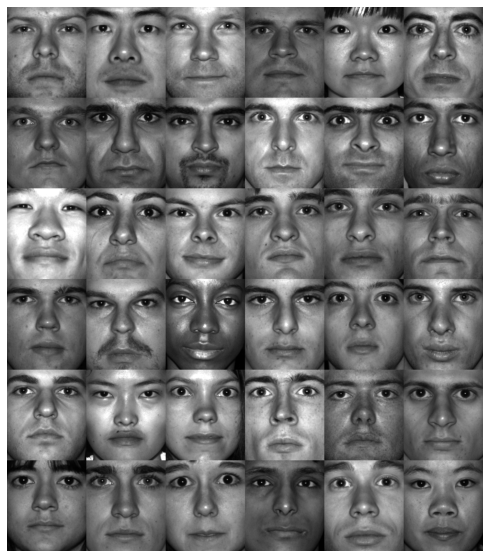

In [3]:
#Displaying our faces
allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

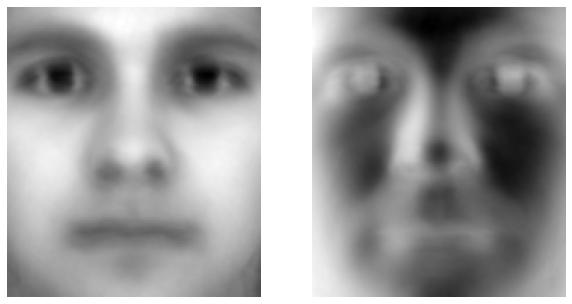

In [4]:
#Creating Training Data
training = faces[:,:np.sum(nfaces[:36])]
average_face = np.mean(training, axis=1)

#Subtracting Mean Face to "Center" X
X = training - np.tile(average_face,(training.shape[1],1)).T

#Run SVD on our now mean-centered matrix X
U, Sigma, VT=np.linalg.svd(X, full_matrices=False)

#Show our average face projection (Some linear combination of all our faces)
figure1 = plt.figure() #Adjusting shape of a figure since it is a column

axis1 = figure1.add_subplot(121)
img_average = axis1.imshow(np.reshape(average_face,(m,n)).T)
img_average.set_cmap("gray")
plt.axis("off")

axis2 = figure1.add_subplot(122)
img_u1 = axis2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap("gray")
plt.axis("off")

plt.show()

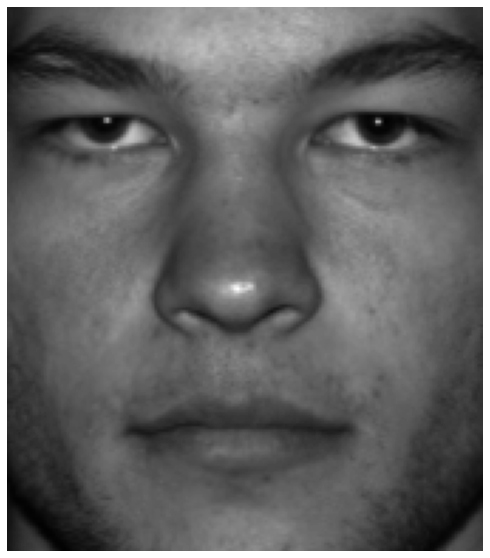

In [5]:
#Using our already constructed array to project a new face to see how it looks
test_face = faces[:,np.sum(nfaces[:36])]
plt.imshow(np.reshape(test_face, (m,n)).T)
plt.set_cmap("gray")
plt.axis("off")
plt.show()

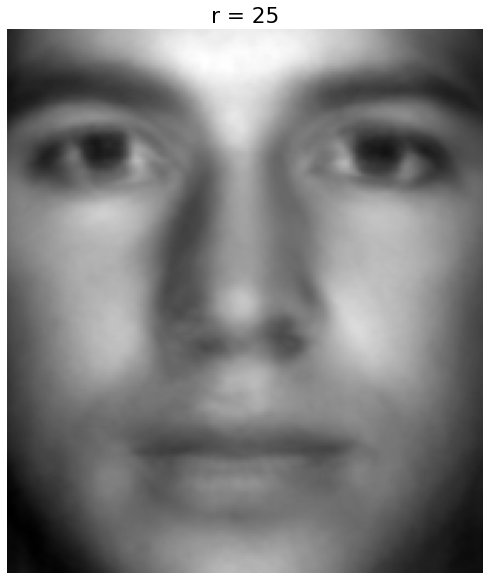

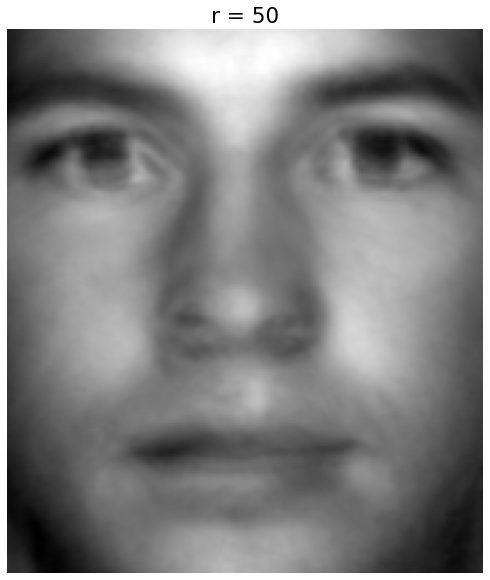

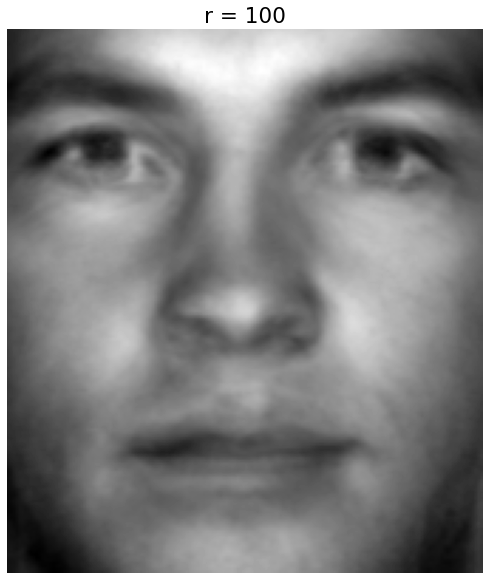

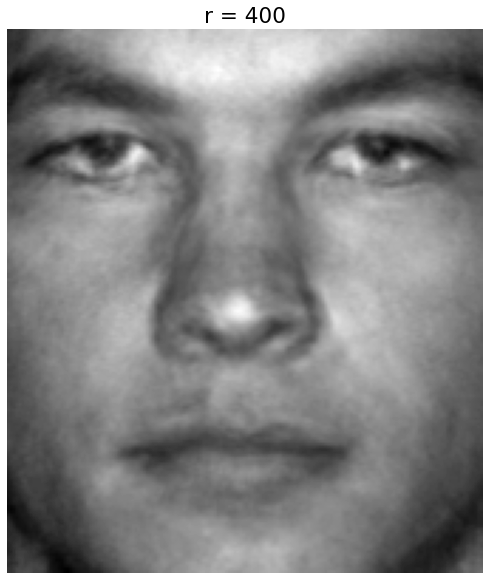

In [6]:
mean_test_face = test_face - average_face
r_values = [25, 50, 100, 400]

for r in r_values:
    U_face = average_face + U[:,:r] @ U[:,:r].T @ mean_test_face
    img = plt.imshow(np.reshape(U_face, (m,n)).T)
    img.set_cmap("gray")
    plt.axis("off")
    plt.title(f"r = {r}")
    plt.show()
    
    